In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
______________________________________________

In [3]:
model.compile(optimizer=RMSprop(learning_rate=1e-4), 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(x_train, y_train, epochs=10, 
                    batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 15s 95ms/step - loss: 0.7608 - acc: 0.5234 - val_loss: 0.6865 - val_acc: 0.5368
Epoch 2/10
157/157 [==============================] - 15s 96ms/step - loss: 0.6640 - acc: 0.6773 - val_loss: 0.6625 - val_acc: 0.6444
Epoch 3/10
157/157 [==============================] - 15s 95ms/step - loss: 0.6125 - acc: 0.7666 - val_loss: 0.5960 - val_acc: 0.7490
Epoch 4/10
157/157 [==============================] - 15s 95ms/step - loss: 0.5040 - acc: 0.8138 - val_loss: 0.4744 - val_acc: 0.8134
Epoch 5/10
157/157 [==============================] - 15s 96ms/step - loss: 0.3897 - acc: 0.8535 - val_loss: 0.4361 - val_acc: 0.8394
Epoch 6/10
157/157 [==============================] - 15s 96ms/step - loss: 0.3275 - acc: 0.8795 - val_loss: 0.4204 - val_acc: 0.8552
Epoch 7/10
157/157 [==============================] - 15s 95ms/step - loss: 0.2872 - acc: 0.8952 - val_loss: 0.4463 - val_acc: 0.8498
Epoch 8/10
157/157 [==============================] - 15s 95ms

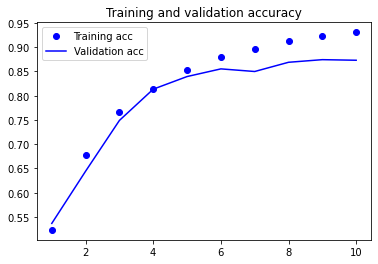

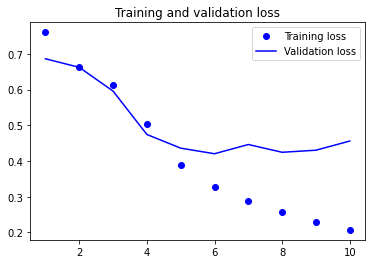

In [4]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [5]:
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(learning_rate=1e-4), 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(x_train, y_train, epochs=6, 
                    batch_size=128, validation_split=0.2)

model.evaluate(x_test, y_test)

Epoch 1/6
157/157 [==============================] - 16s 97ms/step - loss: 1.1198 - acc: 0.5010 - val_loss: 0.6927 - val_acc: 0.5296
Epoch 2/6
157/157 [==============================] - 15s 96ms/step - loss: 0.6818 - acc: 0.6076 - val_loss: 0.6755 - val_acc: 0.6296
Epoch 3/6
157/157 [==============================] - 15s 96ms/step - loss: 0.6486 - acc: 0.7436 - val_loss: 0.6389 - val_acc: 0.7326
Epoch 4/6
157/157 [==============================] - 15s 95ms/step - loss: 0.5828 - acc: 0.7998 - val_loss: 0.5484 - val_acc: 0.7930
Epoch 5/6
157/157 [==============================] - 15s 95ms/step - loss: 0.4603 - acc: 0.8373 - val_loss: 0.4399 - val_acc: 0.8276
Epoch 6/6
782/782 [==============================] - 5s 6ms/step - loss: 0.4089 - acc: 0.8422


[0.4089375436306, 0.8421599864959717]

In [6]:
import os

data_dir = '../datasets/jena_climate/'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

with open(fname) as f:
    data = f.read()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [7]:
import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))

for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [8]:
def generator(data, lookback, delay, min_index, max_index, 
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        
        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        
        yield samples, targets

In [9]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data, 
                      lookback=lookback, 
                      delay=delay, 
                      min_index=0, 
                      max_index=200000, 
                      shuffle=True, 
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data, 
                    lookback=lookback, 
                    delay=delay, 
                    min_index=200001, 
                    max_index=300000, 
                    step=step, 
                    batch_size=batch_size)
test_gen = generator(float_data, 
                     lookback=lookback, 
                     delay=delay, 
                     min_index=300001, 
                     max_index=None, 
                     step=step, 
                     batch_size=batch_size)

val_steps = (300000 - 200001 - lookback) // batch_size
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu', 
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [11]:
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(train_gen, 
                    steps_per_epoch=500, 
                    epochs=20, 
                    validation_data=val_gen, 
                    validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 13s 26ms/step - loss: 0.4129 - val_loss: 0.4313
Epoch 2/20
500/500 [==============================] - 13s 26ms/step - loss: 0.3578 - val_loss: 0.4625
Epoch 3/20
500/500 [==============================] - 13s 26ms/step - loss: 0.3386 - val_loss: 0.4439
Epoch 4/20
500/500 [==============================] - 13s 26ms/step - loss: 0.3229 - val_loss: 0.4466
Epoch 5/20
500/500 [==============================] - 13s 27ms/step - loss: 0.3114 - val_loss: 0.4502
Epoch 6/20
500/500 [==============================] - 13s 26ms/step - loss: 0.3005 - val_loss: 0.4536
Epoch 7/20
500/500 [==============================] - 13s 27ms/step - loss: 0.2929 - val_loss: 0.4568
Epoch 8/20
500/500 [==============================] - 13s 26ms/step - loss: 0.2858 - val_loss: 0.4437
Epoch 9/20
500/500 [==============================] - 13s 26ms/step - loss: 0.2814 - val_loss: 0.4511
Epoch 10/20
500/500 [==============================] - 13s 26ms/step - loss: 0.275

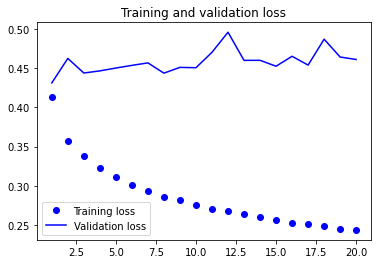

In [12]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
lookback = 1440
step = 3
delay = 144
batch_size = 128

train_gen = generator(float_data, 
                      lookback=lookback, 
                      delay=delay, 
                      min_index=0, 
                      max_index=200000, 
                      shuffle=True, 
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data, 
                    lookback=lookback, 
                    delay=delay, 
                    min_index=200001, 
                    max_index=300000, 
                    step=step, 
                    batch_size=batch_size)
test_gen = generator(float_data, 
                     lookback=lookback, 
                     delay=delay, 
                     min_index=300001, 
                     max_index=None, 
                     step=step, 
                     batch_size=batch_size)

val_steps = (300000 - 200001 - lookback) // batch_size
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [14]:
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu', 
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 13,793
Trainable params: 13,793
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(train_gen, 
                    steps_per_epoch=500, 
                    epochs=20, 
                    validation_data=val_gen, 
                    validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 69s 134ms/step - loss: 0.3300 - val_loss: 0.3379
Epoch 2/20
500/500 [==============================] - 67s 134ms/step - loss: 0.2942 - val_loss: 0.2747
Epoch 3/20
500/500 [==============================] - 67s 134ms/step - loss: 0.2813 - val_loss: 0.2801
Epoch 4/20
500/500 [==============================] - 67s 133ms/step - loss: 0.2708 - val_loss: 0.2784
Epoch 5/20
500/500 [==============================] - 67s 133ms/step - loss: 0.2644 - val_loss: 0.2751
Epoch 6/20
500/500 [==============================] - 67s 134ms/step - loss: 0.2550 - val_loss: 0.2790
Epoch 7/20
500/500 [==============================] - 67s 134ms/step - loss: 0.2506 - val_loss: 0.2929
Epoch 8/20
500/500 [==============================] - 67s 134ms/step - loss: 0.2459 - val_loss: 0.2859
Epoch 9/20
500/500 [==============================] - 67s 134ms/step - loss: 0.2402 - val_loss: 0.2864
Epoch 10/20
500/500 [==============================] - 67s 134ms/step - l

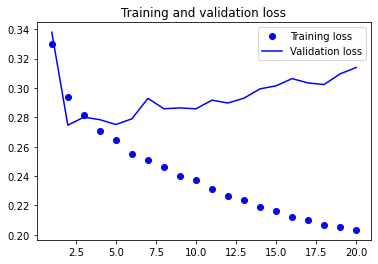

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()